# Lab 1 

Erika Falco 

March 9, 2024

## Part 1: The Gravitational Potential of the Earth

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy 
from scipy.integrate import quad 

In [2]:
# Defining my constants here 
G = 6.67*10**-11 #m^3/kg/s^2
R_Earth = 6378*10**3 #m -- Radius of Earth
d_Earth_Moon = 3.8*10**8 #m -- Earth to moon distance

M_Moon = 7.3*10**22 #kg
M_Earth = 5.9*10**24 #kg 

M_Apollo_cm = 5500 #kg

In [4]:
# Defining my GP function!
def GP(M, xM, yM, x, y):
    # r = distance between mass location and our reference point
    r = np.sqrt((xM-x)**2 + (yM-y)**2)

    # Time to rule out a singularity error 
    if np.isclose(xM, x) and np.isclose(yM, y):
        return np.nan
    
    else: 
        GP = -(G*M)/r
        return GP #Joules/kg

# Making a vectorizable function to use for plotting
GP_vec = np.vectorize(GP)

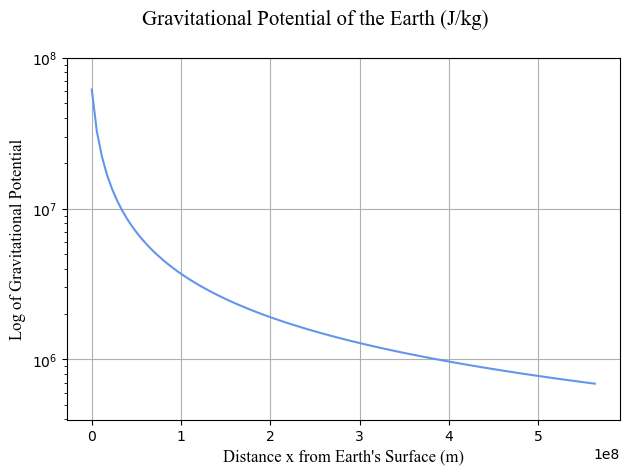

In [6]:
fig, ax = plt.subplots()

nx = 100
x = np.linspace(R_Earth, 1.5*d_Earth_Moon, nx) #m
y = np.zeros_like(x) #m

# My values for gravitational potential:
dim1_GP_Earth = np.abs(GP_vec(M_Earth, 0, 0, x, y)) #Joules/kg

# I want to graph as a function of distance from Earth's surface, so this will be my x axis.
x_from_surface = x-R_Earth #m

# Plotting GP as a function of distance from Earth's surface 
ax.plot(x_from_surface, dim1_GP_Earth, color = "cornflowerblue")
ax.set_yscale("log")

# Setting my labels, gridlines, and axes
ax.set_xlabel("Distance x from Earth's Surface (m)", fontsize = 12, fontname = "Times New Roman")
ax.set_ylabel("Log of Gravitational Potential", fontsize = 12, fontname = "Times New Roman")
fig.suptitle("Gravitational Potential of the Earth (J/kg)", fontsize = 15, fontname = "Times New Roman")

ax.grid()
ax.set_ylim(10**5.6, 10**8)

fig.tight_layout()

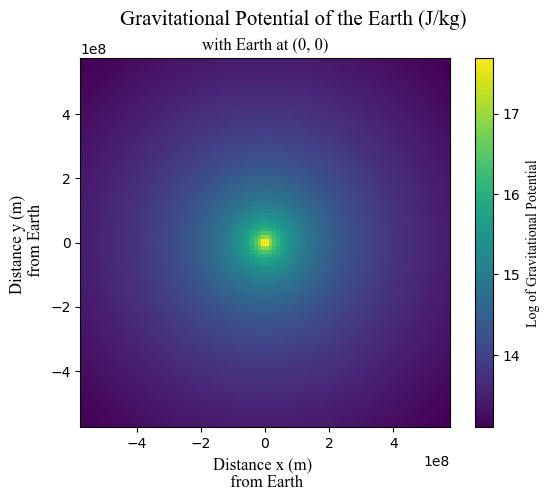

In [9]:
# Setting up arrays for the points at which I want to evaluate GP 
nx = 100
ny = 100
x = np.linspace(-1.5*d_Earth_Moon, 1.5*d_Earth_Moon, nx) #m
y = np.linspace(-1.5*d_Earth_Moon, 1.5*d_Earth_Moon, ny) #m

# Meshing the arrays to create a grid to plot on 
xmesh, ymesh = np.meshgrid(x, y) #m

# Calculating GP for these points 
dim2_GP_Earth = np.abs(GP_vec(M_Earth, 0, 0, xmesh, ymesh)) #J/kg

# Creating my plot
fig, ax = plt.subplots()
mesh = ax.pcolormesh(xmesh, ymesh, np.log(dim2_GP_Earth));
cbar = fig.colorbar(mesh)

#Setting colorbar, titles, labels, etc.
cbar.set_label("Log of Gravitational Potential", fontname = "Times New Roman")
ax.set_xlabel("Distance x (m) \n from Earth", fontsize = 12, fontname = "Times New Roman")
ax.set_ylabel("Distance y (m) \n from Earth", fontsize = 12, fontname = "Times New Roman")
fig.suptitle("Gravitational Potential of the Earth (J/kg)", fontsize = 15, fontname = "Times New Roman")
ax.set_title("with Earth at (0, 0)", fontsize = 12, fontname = "Times New Roman");

ax.set_aspect("equal")

## Part 2: The Gravitational Potential of the Earth-Moon System

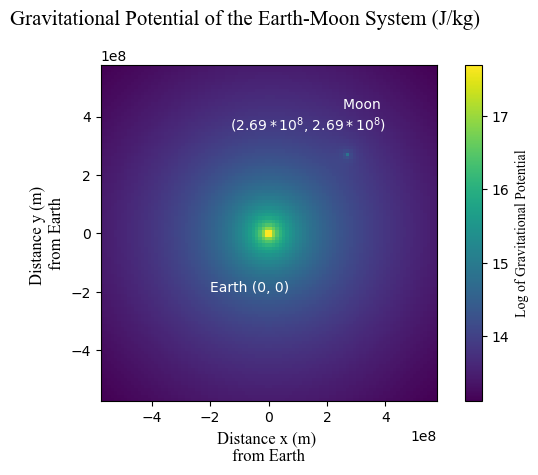

In [12]:
# Once again setting up my x and y evaluation points 
x = np.linspace(-1.5*d_Earth_Moon, 1.5*d_Earth_Moon, nx) #m
y = np.linspace(-1.5*d_Earth_Moon, 1.5*d_Earth_Moon, ny) #m

# Meshing these together 
xmesh, ymesh = np.meshgrid(x, y) #m

# Defining my coordinates for the Earth and Moon 
x_moon = d_Earth_Moon/np.sqrt(2) #m
y_moon = d_Earth_Moon/np.sqrt(2) #m

x_earth = 0 #m
y_earth = 0 #m

# Now using my function to define GP at my desired points from the Earth and the Moon 
GP_Earth = np.abs(GP_vec(M_Earth, x_earth, y_earth, xmesh, ymesh)) #J/kg
GP_Moon = np.abs(GP_vec(M_Moon, x_moon, y_moon, xmesh, ymesh)) #J/kg

# Adding the earth and moon contributions of GP at each point to get the total GP 
GP_tot = GP_Earth + GP_Moon #J/kg

# Creating my plot 
fig, ax = plt.subplots()
mesh2 = ax.pcolormesh(xmesh, ymesh, np.log(GP_tot));
cbar = fig.colorbar(mesh2);
cbar.set_label("Log of Gravitational Potential", fontname = "Times New Roman")
ax.set_xlabel("Distance x (m) \nfrom Earth", fontsize =12, fontname = "Times New Roman")
ax.set_ylabel("Distance y (m) \nfrom Earth", fontsize = 12, fontname = "Times New Roman")
fig.suptitle("Gravitational Potential of the Earth-Moon System (J/kg)", fontsize = 15, fontname = "Times New Roman", ha = "center")

# Indicating where the moon and earth are on this plot
ax.text(4*10**8, 4*10**8, "Moon \n($2.69*10^8$, $2.69*10^8$)", ha = "right", color = "white", va = "center");
ax.text(-2*10**8, -2*10**8, "Earth (0, 0)", ha = "left", color = "white");

#print(f"{x_moon:.3f}, {y_moon:.3f}")
ax.set_aspect("equal");
fig.tight_layout()

Earth at (0, 0)
Moon at (2.69*10^8, 2.69*10^8)


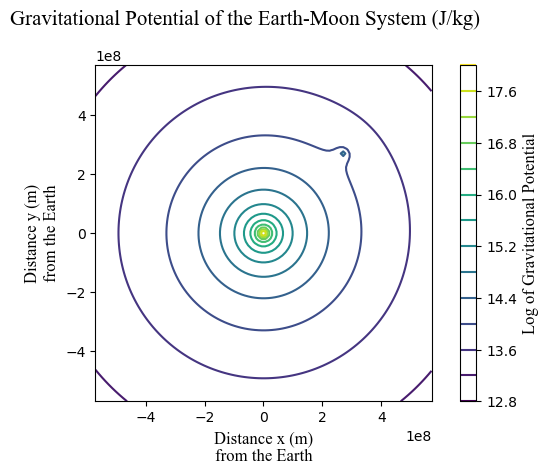

In [16]:
# Creating an additional plot
fig, ax = plt.subplots()
# Plotting a contour of GP
contour = ax.contour(xmesh, ymesh, np.log(GP_tot), 12) #J/kg
cbar = fig.colorbar(contour)
cbar.set_label("Log of Gravitational Potential", fontsize = 12, fontname = "Times New Roman")
ax.set_xlabel("Distance x (m)\nfrom the Earth", fontsize = 12, fontname = "Times New Roman")
ax.set_ylabel("Distance y (m)\nfrom the Earth", fontsize = 12, fontname = "Times New Roman")
fig.suptitle("Gravitational Potential of the Earth-Moon System (J/kg)", fontsize = 15, ha = "center", fontname = "Times New Roman")

ax.set_aspect("equal")
print("Earth at (0, 0)\nMoon at (2.69*10^8, 2.69*10^8)")

fig.tight_layout()

## Part 3: The Gravitational Force Field of the Earth-Moon System

In [17]:
# Defining a function for gravitational force 
def Fg(M1, m2, x1, y1, x2, y2): #N
    rx = x2 - x1 #m
    ry = y2 - y1 #m
    r = np.sqrt(rx**2 + ry**2) #Magnitude of the distance vector r 

    # Time to eliminate the possibility of dividing by zero 
    if np.isclose(x1, x2) and np.isclose(y1, y2):
        Fx = np.nan
        Fy = np.nan
    
    else:
        r_vec = np.array([rx, ry]) #r vector with x and y distances as components 
        r_hat_vec = r_vec/np.linalg.norm(r_vec) #unit vector r hat 
        
        Fx = r_hat_vec[0]*(-G*M1*m2)/(r**2) #Multiplying the x component of the unit vector by our total force
        Fy = r_hat_vec[1]*(-G*M1*m2)/(r**2) #Multiplying the y component of the unit vector by our total force
        
        return Fx, Fy

# Setting up my evaluation points
nx = 100
ny = 100
x = np.linspace(-1.5*d_Earth_Moon, 1.5*d_Earth_Moon, nx)
y = np.linspace(-1.5*d_Earth_Moon, 1.5*d_Earth_Moon, ny)

# Meshing them into a grid 
xmesh, ymesh = np.meshgrid(x, y)

# Defining my Moon and Earth locations 
x_moon = d_Earth_Moon/np.sqrt(2) #m
y_moon = d_Earth_Moon/np.sqrt(2) #m

x_earth = 0 #m
y_earth = 0 #m

# Creating empty arrays to fill in with forces  
Fx = np.zeros((ny, nx))
Fy = np.zeros((ny, nx))

for y in range(ny): # visit all y points (all rows)
    for x in range(nx): # visit all x points (all columns)
        
        # Now grabbing the right coordinates and calculating Fg components 
        Fg_earth_x, Fg_earth_y = Fg(M_Earth, M_Apollo_cm, x_earth, y_earth, xmesh[y, x], ymesh[y, x]) # y value controls the ROW and x controls the COLUMN: IMPORTANT!
        Fg_moon_x, Fg_moon_y = Fg(M_Moon, M_Apollo_cm, x_moon, y_moon, xmesh[y, x], ymesh[y, x])
        
        # Filling our array with the sum of the forces 
        Fx[y, x] += (Fg_earth_x + Fg_moon_x) #N
        Fy[y, x] += (Fg_earth_y + Fg_moon_y) #N

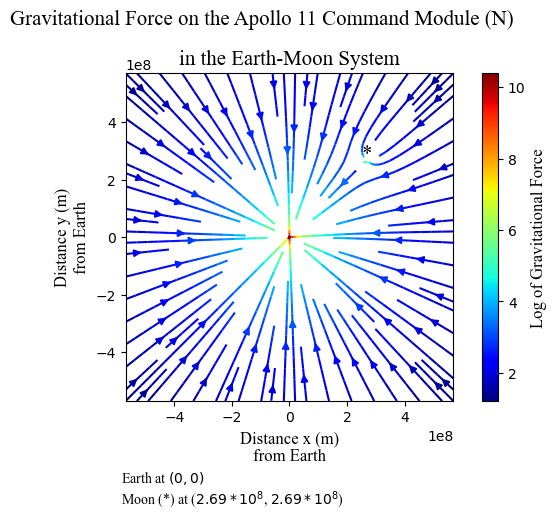

In [18]:
# Creating yet another plot!
fig, ax = plt.subplots()

# Making my colors correspond to the log of the force's magnitude
import matplotlib.cm as cm
colors = np.log(np.hypot(Fx, Fy))

# Getting some stream plot action here, mapping out the force vectors at each point 
stream = ax.streamplot(xmesh, ymesh, Fx, Fy, color = colors, cmap = "jet", density = 1); 
# Labeling where the moon is!
ax.text(x_moon, y_moon, "*", fontsize = 15, ha = "center", fontname = "Times New Roman")

#Setting up my colorbar, labels, titles, etc. 
cbar = fig.colorbar(stream.lines)
cbar.set_label("Log of Gravitational Force", fontsize = 12, fontname = "Times New Roman")
ax.set_xlabel("Distance x (m)\nfrom Earth", fontsize = 12, fontname = "Times New Roman")
ax.set_ylabel("Distance y (m)\nfrom Earth", fontsize = 12, fontname = "Times New Roman")
fig.suptitle("Gravitational Force on the Apollo 11 Command Module (N)", fontsize =15, fontname = "Times New Roman", ha = "center")
ax.set_title("in the Earth-Moon System", fontsize = 15, fontname = "Times New Roman")

# Denoting the Earth and Moon locations
fig.text(0.28, -0.05, "Earth at $(0, 0)$\nMoon (*) at ($2.69*10^8$, $2.69*10^8$)", fontname = "Times New Roman")
ax.set_aspect("equal")

fig.tight_layout()

# Part 4: Altitude of the Saturn V Rocket

In [22]:
# Defining my constants here
mf = 7.5*10**5 #kg
mo = 2.8*10**6 #kg

ve = 2.4*10**3 #m/s
g = 9.81 #m/s**2
deriv_m = 1.3*10**4 #kg/s

In [23]:
# Calculating burn time 
T = (mo - mf)/deriv_m #seconds 
print(f"Burn time: {T:.3f} seconds")

Burn time: 157.692 seconds


In [24]:
# Creating a function to calculate change in velocity
def dv(t):
    dv = ve*np.log(mo/(mo - deriv_m*t)) - g*t #m/s
    # Want it to stop when v = 0
    if dv <= 0:
        return 0
    else: 
        return dv #m/s

In [25]:
# Calculating the height at burnout!
h, unc_h = quad(dv, 0, T) #m

print(f"Altitude = {h:.3f} m +/- {unc_h:10.4e} m")

Altitude = 74093.980 m +/- 5.8488e-08 m
